## **Measure of central Tenency**

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

**Introduction Image**

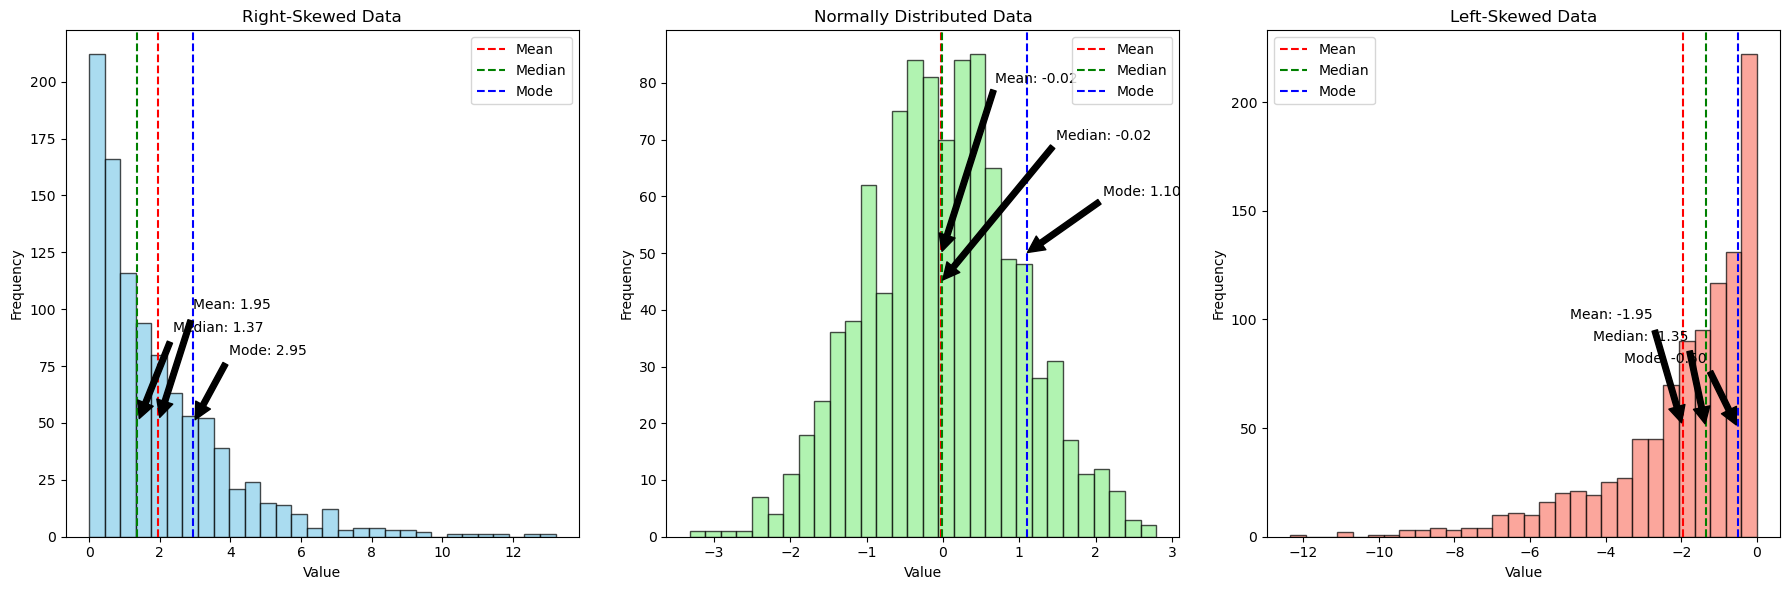

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate datasets
np.random.seed(10)  # For reproducibility

# Right-skewed data
right_skewed = np.random.exponential(scale=2, size=1000)
right_skewed_mean = np.mean(right_skewed)
right_skewed_median = np.median(right_skewed)
right_skewed_mode = st.mode(right_skewed)

# Normally distributed data
normal = np.random.normal(loc=0, scale=1, size=1000)
normal_mean = np.mean(normal)
normal_median = np.median(normal)
normal_mode = st.mode(normal)

# Left-skewed data
left_skewed = -np.random.exponential(scale=2, size=1000)
left_skewed_mean = np.mean(left_skewed)
left_skewed_median = np.median(left_skewed)
left_skewed_mode = st.mode(left_skewed)

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot right-skewed data
axs[0].hist(right_skewed, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axs[0].axvline(right_skewed_mean, color='r', linestyle='--', label='Mean')
axs[0].axvline(right_skewed_median, color='g', linestyle='--', label='Median')
axs[0].axvline(right_skewed_mode, color='b', linestyle='--', label='Mode')
axs[0].set_title('Right-Skewed Data')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[0].annotate(f'Mean: {right_skewed_mean:.2f}', xy=(right_skewed_mean, 50), xytext=(right_skewed_mean + 1, 100),
                 arrowprops=dict(facecolor='black', shrink=0.05))
axs[0].annotate(f'Median: {right_skewed_median:.2f}', xy=(right_skewed_median, 50), xytext=(right_skewed_median + 1, 90),
                 arrowprops=dict(facecolor='black', shrink=0.05))
axs[0].annotate(f'Mode: {right_skewed_mode:.2f}', xy=(right_skewed_mode, 50), xytext=(right_skewed_mode + 1, 80),
                 arrowprops=dict(facecolor='black', shrink=0.05))

# Plot normally distributed data
axs[1].hist(normal, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axs[1].axvline(normal_mean, color='r', linestyle='--', label='Mean')
axs[1].axvline(normal_median, color='g', linestyle='--', label='Median')
axs[1].axvline(normal_mode, color='b', linestyle='--', label='Mode')
axs[1].set_title('Normally Distributed Data')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].legend()
axs[1].annotate(f'Mean: {normal_mean:.2f}', xy=(normal_mean, 50), xytext=(normal_mean + 0.7, 80),
                 arrowprops=dict(facecolor='black', shrink=0.01))
axs[1].annotate(f'Median: {normal_median:.2f}', xy=(normal_median, 45), xytext=(normal_median + 1.5, 70),
                 arrowprops=dict(facecolor='black', shrink=0.01))
axs[1].annotate(f'Mode: {normal_mode:.2f}', xy=(normal_mode, 50), xytext=(normal_mode + 1, 60),
                 arrowprops=dict(facecolor='black', shrink=0.01))

# Plot left-skewed data
axs[2].hist(left_skewed, bins=30, color='salmon', edgecolor='black', alpha=0.7)
axs[2].axvline(left_skewed_mean, color='r', linestyle='--', label='Mean')
axs[2].axvline(left_skewed_median, color='g', linestyle='--', label='Median')
axs[2].axvline(left_skewed_mode, color='b', linestyle='--', label='Mode')
axs[2].set_title('Left-Skewed Data')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Frequency')
axs[2].legend()
axs[2].annotate(f'Mean: {left_skewed_mean:.2f}', xy=(left_skewed_mean, 50), xytext=(left_skewed_mean - 3, 100),
                 arrowprops=dict(facecolor='black', shrink=0.05))
axs[2].annotate(f'Median: {left_skewed_median:.2f}', xy=(left_skewed_median, 50), xytext=(left_skewed_median - 3, 90),
                 arrowprops=dict(facecolor='black', shrink=0.05))
axs[2].annotate(f'Mode: {left_skewed_mode:.2f}', xy=(left_skewed_mode, 50), xytext=(left_skewed_mode - 3, 80),
                 arrowprops=dict(facecolor='black', shrink=0.05))

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot to a file
plt.savefig('assets/measure_of_central_tendency.png')

# Show the plot
plt.show()


**Measure of Dispersion**

In [5]:
from mpl_toolkits.axisartist.axislines import SubplotZero
from scipy.stats import gaussian_kde
import seaborn as sns

[Source Code](https://stackoverflow.com/questions/33737736/matplotlib-axis-arrow-tip)

In [6]:
def arrowed_spines(fig, ax):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)

**Histogram & Skewness**

In [7]:
age = [10, 12, 14, 18, 24, 26, 30, 35, 36, 37, 40, 41, 42, 43, 50, 51]

In [8]:
# plt.hist(a, gaussian_kde=True)
sns.histplot(a, kde=True, bins=5)
plt.xlabel("Age")
plt.ylabel("Frequency of a number")
plt.title("Histogram")
plt.ylim(0,7)
plt.xlim(0,60)
plt.grid()
# Save the plot to a file
plt.savefig('assets/histogram.png')

# Show the plot
plt.show()

NameError: name 'a' is not defined

**Normal Distribution**

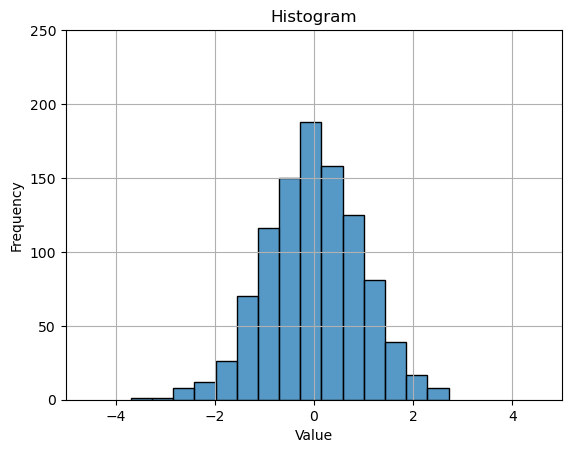

In [ ]:
# Parameters
mean = 0       # Mean of the normal distribution
std_dev = 1    # Standard deviation of the normal distribution
num_samples = 1000  # Number of samples to generate

np.random.seed(6)
# Generate random samples
normal = np.random.normal(loc=mean, scale=std_dev, size=num_samples)

sns.histplot(normal, bins=15)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.ylim(0,250)
plt.xlim(-5,5)
plt.grid()
# Save the plot to a file
plt.savefig('assets/normal_hist.png')

# Show the plot
plt.show()

In [9]:
mean = 0
median = 0
mode = 0

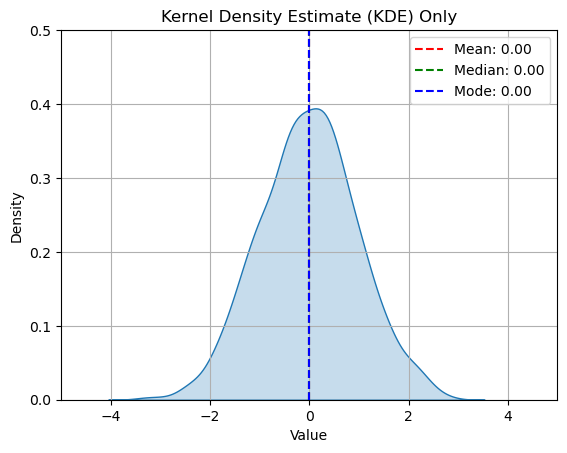

In [10]:
sns.kdeplot(normal, fill=True)

plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
plt.axvline(mode, color='blue', linestyle='--', label=f'Mode: {mode:.2f}')

plt.legend()
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Kernel Density Estimate (KDE) Only")
plt.ylim(0,0.5)
plt.xlim(-5,5)
plt.grid()
# Save the plot to a file
plt.savefig('assets/normal_dist.png')

# Show the plot
plt.show()

**Right Skewed Distribution**

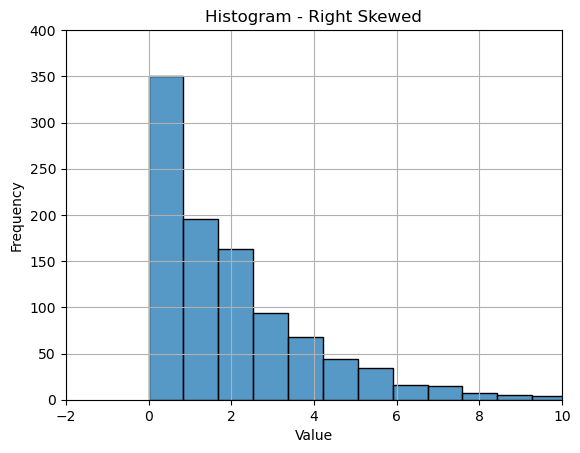

In [66]:
np.random.seed(6)
# Right-skewed data
right_skewed = np.random.exponential(scale=2, size=1000)

sns.histplot(right_skewed, bins=15)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram - Right Skewed")
plt.ylim(0,400)
plt.xlim(-2,10)
plt.grid()
# Save the plot to a file
plt.savefig('assets/right_skewed_hist.png')

# Show the plot
plt.show()

In [86]:
sum(right_skewed < 0.5)

216

In [93]:
right_skewed_mean = st.mean(right_skewed)
right_skewed_median = st.median(right_skewed)
right_skewed_mode = st.mode(right_skewed)
right_skewed_mode = 0.65

In [77]:
print(right_skewed_mean, right_skewed_median, right_skewed_mode)

2.020873340223261 1.3991632403833791 4.4672406039413906


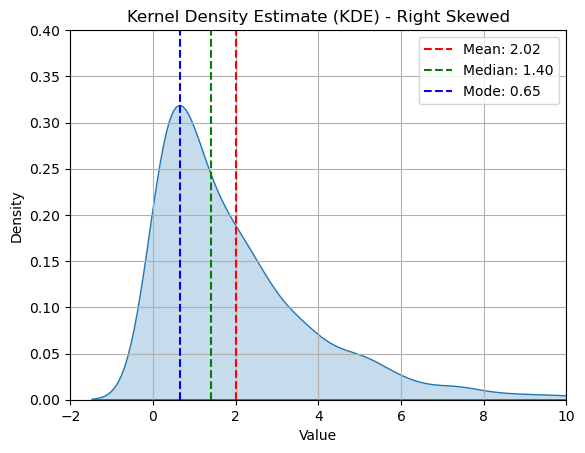

In [94]:
sns.kdeplot(right_skewed, fill=True)

plt.axvline(right_skewed_mean, color='red', linestyle='--', label=f'Mean: {right_skewed_mean:.2f}')
plt.axvline(right_skewed_median, color='green', linestyle='--', label=f'Median: {right_skewed_median:.2f}')
plt.axvline(right_skewed_mode, color='blue', linestyle='--', label=f'Mode: {right_skewed_mode:.2f}')

plt.legend()
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Kernel Density Estimate (KDE) - Right Skewed")
plt.ylim(0,0.4)
plt.xlim(-2,10)
plt.grid()
# Save the plot to a file
plt.savefig('assets/right_skewed_dist.png')

# Show the plot
plt.show()

**Left Skewed Distribution**

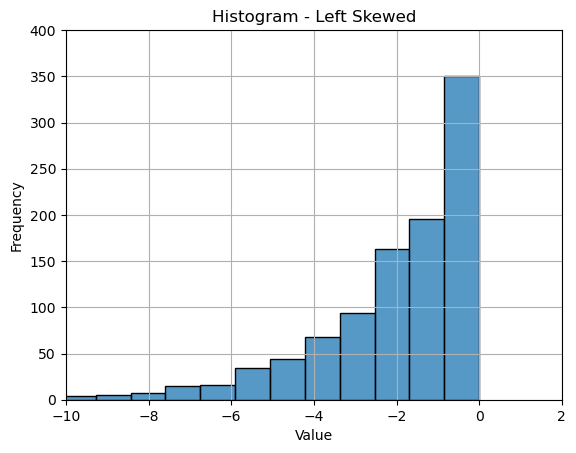

In [71]:
np.random.seed(6)

# Left-skewed data
left_skewed = -np.random.exponential(scale=2, size=1000)

sns.histplot(left_skewed, bins=15)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram - Left Skewed")
plt.ylim(0,400)
plt.xlim(-10,2)
plt.grid()
# Save the plot to a file
plt.savefig('assets/left_skewed_hist.png')

# Show the plot
plt.show()

In [97]:
left_skewed_mean = st.mean(left_skewed)
left_skewed_median = st.median(left_skewed)
left_skewed_mode = st.mode(left_skewed)
left_skewed_mode = -0.65

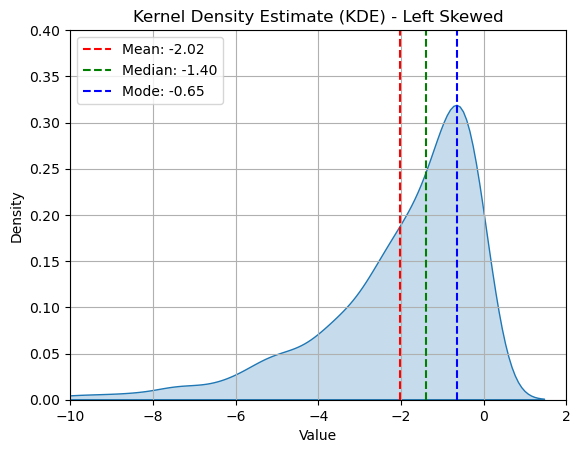

In [98]:
sns.kdeplot(left_skewed, fill=True)

plt.axvline(left_skewed_mean, color='red', linestyle='--', label=f'Mean: {left_skewed_mean:.2f}')
plt.axvline(left_skewed_median, color='green', linestyle='--', label=f'Median: {left_skewed_median:.2f}')
plt.axvline(left_skewed_mode, color='blue', linestyle='--', label=f'Mode: {left_skewed_mode:.2f}')

plt.legend()
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Kernel Density Estimate (KDE) - Left Skewed")
plt.ylim(0,0.4)
plt.xlim(-10,2)
plt.grid()
# Save the plot to a file
plt.savefig('assets/left_skewed_dist.png')

# Show the plot
plt.show()